In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn
import matplotlib
matplotlib.style.use('ggplot')
from Bio import SeqIO, SeqUtils

In [3]:
cov_folder = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_E104_v1/COV/'

In [4]:
cov_header = ["contig", "position", 'coverage']

In [109]:
ph_cov = pd.read_csv(cov_folder +'Pst_E104_v1_ph_ctg.bwamem.Pst79_folder5.sam.sorted.bam.aall.cov', sep='\t', header=None, names=cov_header)

In [6]:
p_cov = pd.read_csv(cov_folder +'Pst_E104_v1_p_ctg.bwamem.Pst79_folder5.sam.sorted.bam.aall.cov', sep='\t', header=None, names=cov_header)

In [44]:
h_cov = pd.read_csv(cov_folder + 'Pst_E104_v1_h_ctg.bwamem.Pst79_folder5.sam.sorted.bam.aall.cov', sep='\t', header=None, names=cov_header)

The mean overall coverage is 132.15 and the std is 429.36 for p


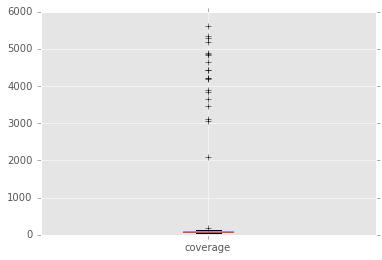

In [8]:
mean_cov_per_contig = p_cov.groupby('contig').mean()

mean_cov_per_contig['coverage'].plot.box()

overall_mean = p_cov['coverage'].mean()

overall_std = p_cov['coverage'].std()

print("The mean overall coverage is %.2f and the std is %.2f for p" % (overall_mean, overall_std))

The mean overall coverage is 71.75 and the std is 306.46 for ph mapping


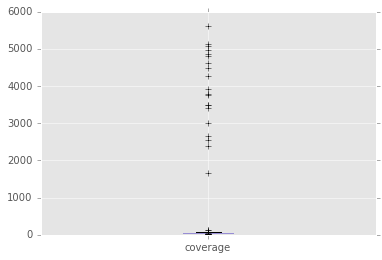

In [9]:
mean_cov_per_contig_ph = ph_cov.groupby('contig').mean()
mean_cov_per_contig_ph['contig'] = mean_cov_per_contig_ph.index
mean_cov_per_contig_ph[mean_cov_per_contig_ph['contig'].str.contains('pcontig')]['coverage'].plot.box(sym ='r+')
#mean_cov_per_contig_ph[mean_cov_per_contig_ph['contig'].str.contains('pcontig')]['coverage'].plot.scatter()
overall_mean_ph = ph_cov['coverage'].mean()

overall_std_ph = ph_cov['coverage'].std()

print("The mean overall coverage is %.2f and the std is %.2f for ph mapping" % (overall_mean_ph, overall_std_ph))

The mean overall coverage is 114.19 and the std is 266.84 for ph mapping


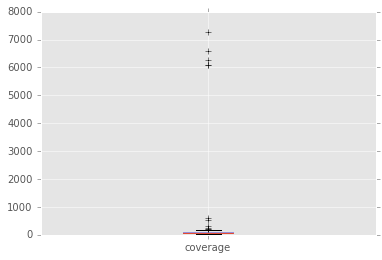

In [12]:
mean_cov_per_contig_h = h_cov.groupby('contig').mean()
mean_cov_per_contig_h['contig'] = mean_cov_per_contig_h.index
mean_cov_per_contig_h['coverage'].plot.box(sym ='r+')
#mean_cov_per_contig_ph[mean_cov_per_contig_ph['contig'].str.contains('pcontig')]['coverage'].plot.scatter()
overall_mean_h = h_cov['coverage'].mean()

overall_std_h = h_cov['coverage'].std()

print("The mean overall coverage is %.2f and the std is %.2f for ph mapping" % (overall_mean_h, overall_std_h))

In [ ]:
#mean_cov_per_contig_ph[mean_cov_per_contig_ph['contig'].str.contains('pcontig')]

In [ ]:
#mean_cov_per_contig.sort_values(by='coverage', ascending=False)

In [13]:
#drop all contigs that have mean coverage above 2000 as calcuated on p mapping.
pcontig_greater_2000 = mean_cov_per_contig[mean_cov_per_contig['coverage'] > 2000].index
p_cov_smaller_2000 = p_cov[~p_cov['contig'].isin(pcontig_greater_2000)]
pcontig_smaller_2000 = p_cov_smaller_2000['contig'].unique()
ph_cov_smaller_2000_p = ph_cov[ph_cov['contig'].isin(pcontig_smaller_2000)]

In [46]:
#drop all contigs that have mean coverage above 2000 as calcuated on p mapping. 
#In this case h selected on the ph contig
ph_cov['pcontig'] = ph_cov['contig'].str.replace('h','p').str[:-4] #this is a bit of a hack as the pcontigs are also
#proccessed but shorten so the next line selects only h contigs
ph_cov_smaller_2000_h = ph_cov[ph_cov['pcontig'].isin(pcontig_smaller_2000)]

In [45]:
#drop all contigs that have mean coverage above 2000 as calcuated on p mapping. Apply this to the h contigs as well
mean_cov_per_contig_h['pcontig'] = mean_cov_per_contig_h['contig'].str.replace('h','p').str[:-4]
h_cov['pcontig'] = h_cov['contig'].str.replace('h','p').str[:-4]
h_cov_smaller_2000 = h_cov[h_cov['pcontig'].isin(pcontig_smaller_2000)]

The mean overall coverage for s2000 contigs is 85.12 and the std is 22.80


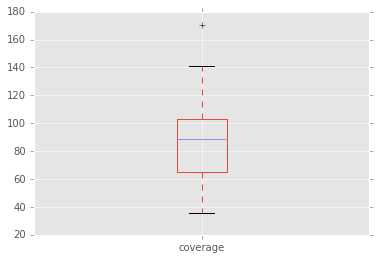

In [50]:
mean_cov_contig_s2000 = p_cov_smaller_2000.groupby(by='contig')['coverage'].mean()

mean_cov_contig_s2000.plot.box()

mean_s2000 = mean_cov_contig_s2000.mean()
std_s2000 = mean_cov_contig_s2000.std()

print("The mean overall coverage for s2000 contigs is %.2f and the std is %.2f" % (mean_s2000, std_s2000))

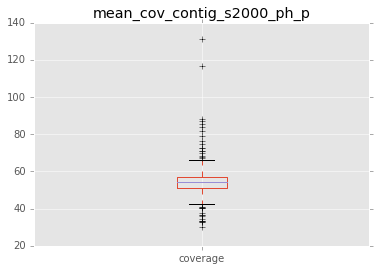

In [51]:
mean_cov_contig_s2000_ph_p = ph_cov_smaller_2000_p.groupby(by='contig')['coverage'].mean()
mean_cov_contig_s2000_ph_p.plot.box()
plt.title('mean_cov_contig_s2000_ph_p')

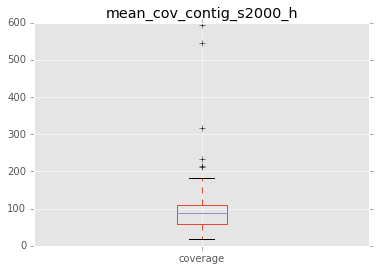

In [52]:
mean_cov_contig_s2000_h = h_cov_smaller_2000.groupby(by='contig')['coverage'].mean()
mean_cov_contig_s2000_h.plot.box()
plt.title('mean_cov_contig_s2000_h')

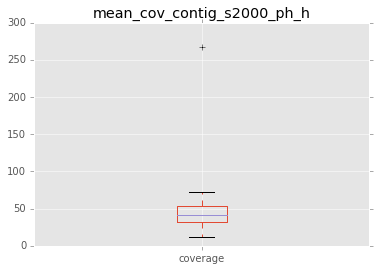

In [54]:
mean_cov_contig_s2000_ph_h = ph_cov_smaller_2000_h.groupby(by='contig')['coverage'].mean()
mean_cov_contig_s2000_ph_h.plot.box()
plt.title('mean_cov_contig_s2000_ph_h')

In [59]:
mean_cov_contig_s2000_h[mean_cov_contig_s2000_h > 200]

contig
hcontig_070_009    317.736116
hcontig_073_001    233.213695
hcontig_118_002    211.449781
hcontig_118_003    213.224106
hcontig_184_001    592.538629
hcontig_193_002    544.586313
Name: coverage, dtype: float64

In [58]:
mean_cov_contig_s2000_ph_h[mean_cov_contig_s2000_ph_h >200]

contig
hcontig_070_009    267.520279
Name: coverage, dtype: float64

In [60]:
len(ph_cov_smaller_2000_p['contig'].unique())

156

In [61]:
#get the list of p contigs with haplotig [pwh] and without haplotig [pwoh]
pwh_list = pd.read_csv('/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_E104_v1/Pst_E104_v1_pwh_ctg.txt',\
sep='\t', header=None)[0].tolist()
pwoh_list = pd.read_csv('/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_E104_v1/Pst_E104_v1_pwoh_ctg.txt',\
sep='\t', header=None)[0].tolist()

In [63]:
mean_s2000_ph_p = mean_cov_contig_s2000_ph_p.mean()
std_s2000_ph_p = mean_cov_contig_s2000_ph_p.std()

print("The mean overall coverage for primary contigs with s2000 contigs is %.2f and the std is %.2f" % (mean_s2000_ph_p, std_s2000_ph_p))

The mean overall coverage for primary contigs with s2000 contigs is 55.29 and the std is 12.93


In [65]:
mean_s2000_ph_h = mean_cov_contig_s2000_ph_h.mean()
std_s2000_ph_h = mean_cov_contig_s2000_ph_h.std()

print("The mean overall coverage for haplotigs with primary contigs cov  < 2000 is %.2f and the std is %.2f" % (mean_s2000_ph_h, std_s2000_ph_h))

The mean overall coverage for haplotigs with primary contigs cov  < 2000 is 42.52 and the std is 15.77


The mean overall coverage for s2000 contigs of pwh contigs while ph mapping is 54.34 and the std is 6.38


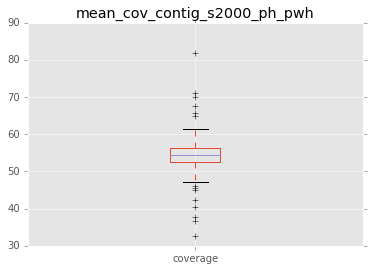

In [66]:
#mean_cov_contig_s2000_ph_pwh represents all contigs that are below 2000x coverage and are pwh contigs
mean_cov_contig_s2000_ph_pwh = mean_cov_contig_s2000_ph_p[mean_cov_contig_s2000_ph_p.index.isin(pwh_list)]
mean_cov_contig_s2000_ph_pwh.plot.box()
plt.title('mean_cov_contig_s2000_ph_pwh')
mean_s2000_ph_pwh = mean_cov_contig_s2000_ph_pwh.mean()
std_s2000_ph_pwh = mean_cov_contig_s2000_ph_pwh.std()
print("The mean overall coverage for s2000 contigs of pwh contigs while ph mapping is %.2f and the std is %.2f" % (mean_s2000_ph_pwh, std_s2000_ph_pwh))

The mean overall coverage for s2000 contigs of pwoh contigs while ph mapping is 56.92 and the std is 19.68


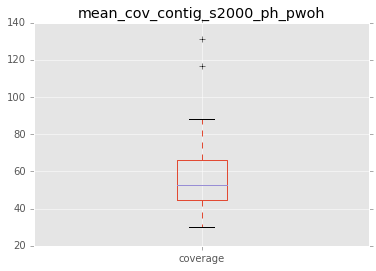

In [67]:
mean_cov_contig_s2000_ph_pwoh = mean_cov_contig_s2000_ph_p[mean_cov_contig_s2000_ph_p.index.isin(pwoh_list)]
mean_cov_contig_s2000_ph_pwoh.plot.box()
plt.title('mean_cov_contig_s2000_ph_pwoh')
mean_s2000_ph_pwoh = mean_cov_contig_s2000_ph_pwoh.mean()
std_s2000_ph_pwoh = mean_cov_contig_s2000_ph_pwoh.std()
print("The mean overall coverage for s2000 contigs of pwoh contigs while ph mapping is %.2f and the std is %.2f" % (mean_s2000_ph_pwoh, std_s2000_ph_pwoh))

In [73]:
#add h contigs as well
print("We have %i sensible pwh contigs with %i h contigs and %i sensible pwoh contigs" % (len(mean_cov_contig_s2000_ph_pwh),len(mean_cov_contig_s2000_ph_h.index), len(mean_cov_contig_s2000_ph_pwoh) ))

We have 99 sensible pwh contigs with 475 h contigs and 57 sensible pwoh contigs


In [74]:
mean_cov_contig_s2000_ph_h.index

Index(['hcontig_000_003', 'hcontig_000_005', 'hcontig_000_011',
       'hcontig_000_024', 'hcontig_000_027', 'hcontig_000_029',
       'hcontig_000_031', 'hcontig_000_036', 'hcontig_000_037',
       'hcontig_000_039',
       ...
       'hcontig_118_003', 'hcontig_129_001', 'hcontig_147_001',
       'hcontig_148_001', 'hcontig_164_001', 'hcontig_166_001',
       'hcontig_184_001', 'hcontig_189_001', 'hcontig_193_002',
       'hcontig_225_001'],
      dtype='object', name='contig', length=475)

In [75]:
mean_cov_contig_s2000_ph_pwh.index

Index(['pcontig_000', 'pcontig_001', 'pcontig_002', 'pcontig_003',
       'pcontig_004', 'pcontig_005', 'pcontig_006', 'pcontig_007',
       'pcontig_008', 'pcontig_009', 'pcontig_010', 'pcontig_011',
       'pcontig_012', 'pcontig_013', 'pcontig_014', 'pcontig_016',
       'pcontig_017', 'pcontig_018', 'pcontig_019', 'pcontig_020',
       'pcontig_021', 'pcontig_022', 'pcontig_023', 'pcontig_025',
       'pcontig_026', 'pcontig_027', 'pcontig_028', 'pcontig_029',
       'pcontig_030', 'pcontig_031', 'pcontig_032', 'pcontig_033',
       'pcontig_034', 'pcontig_035', 'pcontig_036', 'pcontig_037',
       'pcontig_039', 'pcontig_040', 'pcontig_041', 'pcontig_042',
       'pcontig_043', 'pcontig_044', 'pcontig_045', 'pcontig_046',
       'pcontig_047', 'pcontig_048', 'pcontig_049', 'pcontig_050',
       'pcontig_052', 'pcontig_054', 'pcontig_055', 'pcontig_056',
       'pcontig_057', 'pcontig_058', 'pcontig_059', 'pcontig_060',
       'pcontig_062', 'pcontig_064', 'pcontig_065', 'pcontig_0

In [76]:
mean_cov_contig_s2000_ph_p.index

Index(['pcontig_000', 'pcontig_001', 'pcontig_002', 'pcontig_003',
       'pcontig_004', 'pcontig_005', 'pcontig_006', 'pcontig_007',
       'pcontig_008', 'pcontig_009',
       ...
       'pcontig_218', 'pcontig_221', 'pcontig_223', 'pcontig_225',
       'pcontig_228', 'pcontig_230', 'pcontig_231', 'pcontig_233',
       'pcontig_235', 'pcontig_248'],
      dtype='object', name='contig', length=156)

In [78]:
#think about what thresholds to pick in the long run.
threshold_up_ph_p = mean_s2000_ph_p + 2*std_s2000_ph_p
threshold_down_ph_p = mean_s2000_ph_p - 2*std_s2000_ph_p

threshold_up = mean_s2000 + 2*std_s2000
threshold_down = mean_s2000 - 2*std_s2000

In [79]:
#potnetial fully homozygous contigs
mean_cov_contig_s2000_ph_pwoh[mean_cov_contig_s2000_ph_pwoh > threshold_up_ph_p  ]

contig
pcontig_134    131.000226
pcontig_146     85.500241
pcontig_221     87.249173
pcontig_223    116.437507
pcontig_228     83.895713
pcontig_230     87.954408
Name: coverage, dtype: float64

In [138]:
mean_cov_contig_s2000_ph_pwoh

contig
pcontig_015     51.275648
pcontig_024     46.352957
pcontig_051     57.891147
pcontig_063     58.896786
pcontig_087     54.098373
pcontig_100     57.603249
pcontig_103     52.540009
pcontig_112     54.941422
pcontig_120     48.615271
pcontig_128     74.701531
pcontig_130     43.165837
pcontig_134    131.000226
pcontig_138     53.808767
pcontig_139     76.446330
pcontig_140     68.122146
pcontig_146     85.500241
pcontig_149     48.415107
pcontig_150     50.245643
pcontig_152     49.384501
pcontig_153     62.642126
pcontig_154     48.767009
pcontig_157     44.661836
pcontig_163     44.811742
pcontig_165     44.599161
pcontig_170     51.408780
pcontig_171     52.933470
pcontig_172     65.073344
pcontig_173     40.106063
pcontig_174     72.438613
pcontig_176     40.822210
pcontig_177     59.694797
pcontig_179     78.829189
pcontig_181     40.483509
pcontig_182     71.103992
pcontig_185     36.583080
pcontig_186     33.151485
pcontig_187     33.310994
pcontig_188     53.892321
pcont

In [82]:
2*mean_s2000_ph_p - std_s2000_ph_p

97.64081332703367

In [81]:
mean_s2000 - std_s2000

62.318880782234885

In [83]:
#think about what thresholds to pick in the long run.
threshold_up_ph_p = mean_s2000_ph_p + 2*std_s2000_ph_p
threshold_down_ph_p = mean_s2000_ph_p - 2*std_s2000_ph_p

threshold_up = mean_s2000 + 2*std_s2000
threshold_down = mean_s2000 - 2*std_s2000

In [84]:


import warnings
warnings.filterwarnings('ignore')

In [133]:
#now write a loop that does it all for your over the whole two dataframes
bed_p_uniqe_list = []
bed_p_homo_list = []
for contig in pcontig_smaller_2000:
    tmp_p_df = ''
    tmp_ph_df = ''
    #now subset the two dataframes
    tmp_p_df = p_cov[p_cov['contig'] == contig]
    tmp_p_df_ph = ph_cov[ph_cov['contig'] ==  contig]
    #generarte the rolling windows
    tmp_p_df['Rolling_w1000_p'] = tmp_p_df.rolling(window=1000, min_periods=1, center=True, win_type='blackmanharris')['coverage'].mean()
    tmp_p_df_ph['Rolling_w1000_ph_p'] = tmp_p_df_ph.rolling(window=1000, min_periods=1, center=True, win_type='blackmanharris')['coverage'].mean()
    tmp_p_df['Rolling_w10000_p'] = tmp_p_df.rolling(window=10000, min_periods=1, center=True, win_type='blackmanharris')['coverage'].mean()
    tmp_p_df_ph['Rolling_w10000_ph_p'] = tmp_p_df_ph.rolling(window=10000, min_periods=1,center=True, win_type='blackmanharris')['coverage'].mean()
    tmp_p_df['Rolling_w1000_ph_p'] = tmp_p_df_ph['Rolling_w1000_ph_p']

    #potentially p_unique DNA streatches are defined as p contig cov streatches, while doing p mapping, that are heterozygous coverage
    # coverage -> mean_s2000_ph_p
    # [Rolling_w1000_p < mean_s2000_ph_p + 2*std_s2000_ph_p]
    tmp_p_df_p_unique = tmp_p_df[tmp_p_df['Rolling_w1000_p'] < (mean_s2000_ph_p + 2*std_s2000_ph_p)]
    if len(tmp_p_df_p_unique) > 0:
        tmp_p_df_p_unique.reset_index(drop=True, inplace=True)
        #add a position +1 column by copying the position datafram 1: and adding making position+1 for the last element
        # in the dataframe equal to its own value
        tmp_p_df_p_unique['position+1']= tmp_p_df_p_unique.loc[1:, 'position'].\
        append(pd.Series(tmp_p_df_p_unique.loc[len(tmp_p_df_p_unique)-1, 'position'], index=[tmp_p_df_p_unique.index[-1]])).reset_index(drop=True)

        tmp_p_df_p_unique['position_diff+1'] = tmp_p_df_p_unique['position+1'] - tmp_p_df_p_unique['position']

        #add a position -1 column by copying the position datafram :len-2 and adding/making position-1 for the first element
        # in the dataframe equal to its own value
        position_1 = list(tmp_p_df_p_unique.loc[:len(tmp_p_df_p_unique)-2, 'position'])
        position_1.insert(0, tmp_p_df_p_unique.loc[0, 'position'])

        tmp_p_df_p_unique['position-1']= position_1

        tmp_p_df_p_unique['position_diff-1'] =  tmp_p_df_p_unique['position'] - tmp_p_df_p_unique['position-1']
        #start points of feature streatch => where previous position is unequal 1 away
        #tmp_p_df_p_unique[tmp_p_df_p_unique['position_diff-1'] != 1 ].head()

        start_pos_index = ''
        stop_pos_index = ''
        contig_name_list = ''
        p_unique_bed = ''
        #this should be good  now as it flows double check and loop around to finish this off
        start_pos_index = tmp_p_df_p_unique[tmp_p_df_p_unique['position_diff-1'] != 1 ].index
        stop_pos_index = tmp_p_df_p_unique[tmp_p_df_p_unique['position_diff+1'] != 1 ].index

        contig_name_list = [contig]*len(start_pos_index)

        start_pos = [tmp_p_df_p_unique.loc[pos, 'position'] -1 for pos in start_pos_index]
        stop_pos = [tmp_p_df_p_unique.loc[pos, 'position']  for pos in stop_pos_index]

        p_unique_bed = pd.DataFrame([contig_name_list, start_pos, stop_pos]).T
        bed_p_uniqe_list.append(p_unique_bed)
    
    #potentially p_homo DNA streatches are defined as p contig cov streatches, while doing ph mapping, that are homozygous coverage
    # coverage -> 2*mean_s2000_ph_p
    # [Rolling_w1000_p > 2*mean_s2000_ph_p - 2*std_s2000_ph_p]
    #here might be a consideration to ask for a difference in profile (covariance != 1)
    tmp_p_df_p_homo = tmp_p_df[(tmp_p_df['Rolling_w1000_ph_p'] > (2*mean_s2000_ph_p - 2*std_s2000_ph_p))]
    if len(tmp_p_df_p_homo) > 0:
        tmp_p_df_p_homo.reset_index(drop=True, inplace=True)
        #add a position +1 column by copying the position datafram 1: and adding making position+1 for the last element
        # in the dataframe equal to its own value
        tmp_p_df_p_homo['position+1']= tmp_p_df_p_homo.loc[1:, 'position'].\
        append(pd.Series(tmp_p_df_p_homo.loc[len(tmp_p_df_p_homo)-1, 'position'], index=[tmp_p_df_p_homo.index[-1]])).reset_index(drop=True)

        tmp_p_df_p_homo['position_diff+1'] = tmp_p_df_p_homo['position+1'] - tmp_p_df_p_homo['position']

        #add a position -1 column by copying the position datafram :len-2 and adding/making position-1 for the first element
        # in the dataframe equal to its own value
        position_1 = list(tmp_p_df_p_homo.loc[:len(tmp_p_df_p_homo)-2, 'position'])
        position_1.insert(0, tmp_p_df_p_homo.loc[0, 'position'])

        tmp_p_df_p_homo['position-1']= position_1

        tmp_p_df_p_homo['position_diff-1'] =  tmp_p_df_p_homo['position'] - tmp_p_df_p_homo['position-1']
        #start points of feature streatch => where previous position is unequal 1 away
        #tmp_p_df_p_homo[tmp_p_df_p_homo['position_diff-1'] != 1 ].head()

        start_pos_index = ''
        stop_pos_index = ''
        contig_name_list = ''
        p_homo_bed = ''
        #this should be good  now as it flows double check and loop around to finish this off
        start_pos_index = tmp_p_df_p_homo[tmp_p_df_p_homo['position_diff-1'] != 1 ].index
        stop_pos_index = tmp_p_df_p_homo[tmp_p_df_p_homo['position_diff+1'] != 1 ].index

        contig_name_list = [contig]*len(start_pos_index)

        start_pos = [tmp_p_df_p_homo.loc[pos, 'position'] -1 for pos in start_pos_index]
        stop_pos = [tmp_p_df_p_homo.loc[pos, 'position']  for pos in stop_pos_index]

        p_homo_bed = pd.DataFrame([contig_name_list, start_pos, stop_pos]).T
        bed_p_homo_list.append(p_homo_bed)

In [134]:
len(bed_p_uniqe_list)

156

In [135]:
p_homo_bed_df = pd.concat(bed_p_homo_list).sort_values(by=[0,1])
p_unique_bed_df =  pd.concat(bed_p_uniqe_list).sort_values(by=[0,1])

In [136]:
p_homo_bed_df.to_csv(cov_folder+'Pst_E104_v1_ph_ctg.ph_p_homo_cov.bed', header=None, index=None, sep='\t')
p_unique_bed_df.to_csv(cov_folder+'Pst_E104_v1_ph_ctg.p_p_het_cov.bed', header=None, index=None, sep='\t')

In [ ]:
#have a final check on if homo bed does the right thing.

In [137]:
print(2)

2


In [88]:
2*mean_s2000 - 2*std_s2000

124.63776156446977

In [89]:
mean_s2000

85.11841346317429

In [90]:
mean_s2000_ph_p

55.28630268196225

# More playing around below

In [97]:
check = p_cov[p_cov['contig'] == 'pcontig_000']

In [98]:
check.head()

,contig,position,coverage
73917361,pcontig_000,1,57
73917362,pcontig_000,2,57
73917363,pcontig_000,3,57
73917364,pcontig_000,4,59
73917365,pcontig_000,5,60


In [110]:
ph_cov.head()

,contig,position,coverage
0,pcontig_241,1,18
1,pcontig_241,2,43
2,pcontig_241,3,67
3,pcontig_241,4,85
4,pcontig_241,5,95


In [139]:
tmp_p_df = ''
tmp_ph_df = ''
#now subset the two dataframes
tmp_p_df = p_cov[p_cov['contig'] == 'pcontig_203']
tmp_p_df_ph = ph_cov[ph_cov['contig'] ==  'pcontig_203']
#generarte the rolling windows
tmp_p_df['Rolling_w1000_p'] = tmp_p_df.rolling(window=1000, min_periods=1)['coverage'].mean()
tmp_p_df_ph['Rolling_w1000_ph_p'] = tmp_p_df_ph.rolling(window=1000, min_periods=1)['coverage'].mean()
tmp_p_df['Rolling_w10000_p'] = tmp_p_df.rolling(window=10000, min_periods=1)['coverage'].mean()
tmp_p_df_ph['Rolling_w10000_ph_p'] = tmp_p_df_ph.rolling(window=10000, min_periods=1)['coverage'].mean()
tmp_p_df['Rolling_w1000_ph_p'] = tmp_p_df_ph['Rolling_w1000_ph_p']


In [143]:
tmp_p_df_ph['test'] = tmp_p_df_ph.rolling(window=1000, min_periods=1, center=True, win_type='blackmanharris')['coverage'].mean()

In [141]:
tmp_p_df[(tmp_p_df['position'] > 11915) &(tmp_p_df['position'] < 72752)].head()

,contig,position,coverage,Rolling_w1000_p,Rolling_w10000_p,Rolling_w1000_ph_p
80302342,pcontig_203,11916,76,57.329,104.3486,57.329
80302343,pcontig_203,11917,75,57.341,104.3445,57.341
80302344,pcontig_203,11918,76,57.353,104.3406,57.353
80302345,pcontig_203,11919,76,57.365,104.3367,57.365
80302346,pcontig_203,11920,76,57.376,104.3329,57.376


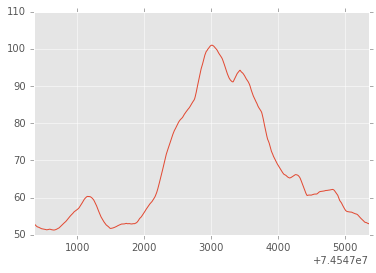

In [122]:
tmp_p_df_ph[(tmp_p_df_ph['position'] > 630000) &(tmp_p_df_ph['position'] < 635000)]['Rolling_w1000_ph_p'].plot()

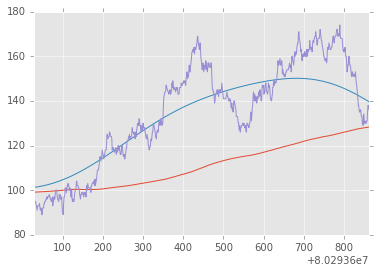

In [145]:
tmp_p_df_ph[(tmp_p_df_ph['position'] > 3202) &(tmp_p_df_ph['position'] < 4038)]['Rolling_w1000_ph_p'].plot()
#tmp_p_df_ph[(tmp_p_df_ph['position'] > 3202) &(tmp_p_df_ph['position'] < 4038)]['Rolling_w10000_ph_p'].plot()
tmp_p_df_ph[(tmp_p_df_ph['position'] > 3202) &(tmp_p_df_ph['position'] < 4038)]['test'].plot()
tmp_p_df_ph[(tmp_p_df_ph['position'] > 3202) &(tmp_p_df_ph['position'] < 4038)]['coverage'].plot()

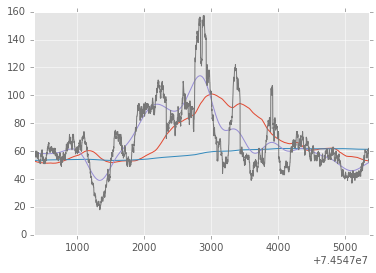

In [132]:
tmp_p_df_ph[(tmp_p_df_ph['position'] > 630000) &(tmp_p_df_ph['position'] < 635000)]['Rolling_w1000_ph_p'].plot()
tmp_p_df_ph[(tmp_p_df_ph['position'] > 630000) &(tmp_p_df_ph['position'] < 635000)]['Rolling_w10000_ph_p'].plot()
tmp_p_df_ph[(tmp_p_df_ph['position'] > 630000) &(tmp_p_df_ph['position'] < 635000)]['test'].plot()
tmp_p_df_ph[(tmp_p_df_ph['position'] > 630000) &(tmp_p_df_ph['position'] < 635000)]['coverage'].plot()

In [126]:
def make_contig_df(contig_path, contig_name):
    """
    Make contig Dataframe from fasta file.
    """    
    f_handle = open(contig_path+'/'+contig_name, mode='r')
    contigs = SeqIO.parse(f_handle, 'fasta')
    contig_length = []
    contig_id =[]
    contig_GC = []
    assembly_id = []
    for x in contigs:
        contig_id.append(x.id)
        contig_length.append(len(x.seq))
        contig_GC.append(SeqUtils.GC(x.seq))
        assembly_id.append(contig_name)
    s1 = pd.Series(contig_id, name='ID')
    s2 = pd.Series(contig_length, name='Length')
    s3 = pd.Series(contig_GC, name='%GC')
    s4 = pd.Series(assembly_id, name="Assembly")
    contig_df = pd.concat([s1, s2, s3, s4], axis=1)
    f_handle.close()
    return contig_df

In [127]:
contig_path = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/122016_assembly/'
p_assembly = 'Pst_E104_v1_p_ctg.fa'
h_assembly = 'Pst_E104_v1_h_ctg.fa'

In [128]:
p_df = make_contig_df(contig_path, p_assembly)
h_df = make_contig_df(contig_path, h_assembly)

In [184]:
p_df_cov_s2000_p = p_df[p_df['ID'].isin(mean_cov_contig_s2000_ph_p.index)]

In [185]:
p_df_cov_s2000_pwh = p_df[p_df['ID'].isin(mean_cov_contig_s2000_ph_pwh.index)]

In [186]:
p_df_cov_s2000_pwoh = p_df[p_df['ID'].isin(mean_cov_contig_s2000_ph_pwoh.index)]

In [189]:
len(h_df_cov_s2000)

475

In [176]:
h_df_cov_s2000 = h_df[h_df['p-ID'].isin(mean_cov_contig_s2000_ph_pwh.index)]

In [190]:
h_df_cov_s2000['Length'].sum()

73478481

In [191]:
p_df_cov_s2000_pwh['Length'].sum()

79770604

In [192]:
p_df_cov_s2000_pwoh['Length'].sum()

3585012

In [140]:
h_df.iloc[0,:]['ID'].replace('h', 'p')[0:11]

'pcontig_014'

In [166]:
h_df['p-ID'] = 'p' + h_df['ID'].str[1:11]

In [167]:
h_df.head()

,ID,Length,%GC,Assembly,p-ID
0,hcontig_014_192,38953,44.676918,Pst_E104_v1_h_ctg.fa,pcontig_014
1,hcontig_049_206,34679,43.389371,Pst_E104_v1_h_ctg.fa,pcontig_049
2,hcontig_020_215,32412,44.613106,Pst_E104_v1_h_ctg.fa,pcontig_020
3,hcontig_057_232,26359,43.992564,Pst_E104_v1_h_ctg.fa,pcontig_057
4,hcontig_034_158,62394,45.350514,Pst_E104_v1_h_ctg.fa,pcontig_034


In [57]:
#potentially p_homo DNA streatches are defined as p contig cov streatches, while doing ph mapping, that are homozygous coverage
# coverage -> 2*mean_s2000_ph_p
# [Rolling_w1000_p > 2*mean_s2000_ph_p - 2*std_s2000_ph_p]
#here might be a consideration to ask for a difference in profile (covariance != 1)
tmp_p_df_p_homo = tmp_p_df[(tmp_p_df['Rolling_w1000_ph_p'] > (2*mean_s2000_ph_p - 2*std_s2000_ph_p))]
    tmp_p_df_p_homo.reset_index(drop=True, inplace=True)
    #add a position +1 column by copying the position datafram 1: and adding making position+1 for the last element
    # in the dataframe equal to its own value
    tmp_p_df_p_homo['position+1']= tmp_p_df_p_homo.loc[1:, 'position'].append(pd.Series(tmp_p_df_p_homo.loc[len(tmp_p_df_p_homo)-1, 'position'], index=[tmp_p_df_p_homo.index[-1]])).reset_index(drop=True)

    tmp_p_df_p_homo['position_diff+1'] = tmp_p_df_p_homo['position+1'] - tmp_p_df_p_homo['position']

    #add a position -1 column by copying the position datafram :len-2 and adding/making position-1 for the first element
    # in the dataframe equal to its own value
    position_1 = list(tmp_p_df_p_homo.loc[:len(tmp_p_df_p_homo)-2, 'position'])
    position_1.insert(0, tmp_p_df_p_homo.loc[0, 'position'])

    tmp_p_df_p_homo['position-1']= position_1

    tmp_p_df_p_homo['position_diff-1'] =  tmp_p_df_p_homo['position'] - tmp_p_df_p_homo['position-1']
    #start points of feature streatch => where previous position is unequal 1 away
    #tmp_p_df_p_homo[tmp_p_df_p_homo['position_diff-1'] != 1 ].head()

    start_pos_index = ''
    stop_pos_index = ''
    contig_name_list = ''
    p_homo_bed = ''
    #this should be good  now as it flows double check and loop around to finish this off
    start_pos_index = tmp_p_df_p_homo[tmp_p_df_p_homo['position_diff-1'] != 1 ].index
    stop_pos_index = tmp_p_df_p_homo[tmp_p_df_p_homo['position_diff+1'] != 1 ].index

    contig_name_list = [tmp_p_df_p_homo['contig'].homo()[0]]*len(start_pos_index)

    start_pos = [tmp_p_df_p_homo.loc[pos, 'position'] -1 for pos in start_pos_index]
    stop_pos = [tmp_p_df_p_homo.loc[pos, 'position']  for pos in stop_pos_index]

    p_homo_bed = pd.DataFrame([contig_name_list, start_pos, stop_pos]).T

In [58]:
tmp_p_df_p_unique.reset_index(drop=True, inplace=True)

#add a position +1 column by copying the position datafram 1: and adding making position+1 for the last element
# in the dataframe equal to its own value
tmp_p_df_p_unique['position+1']= tmp_p_df_p_unique.loc[1:, 'position'].append(pd.Series(tmp_p_df_p_unique.loc[len(tmp_p_df_p_unique)-1, 'position'], index=[tmp_p_df_p_unique.index[-1]])).reset_index(drop=True)

tmp_p_df_p_unique['position_diff+1'] = tmp_p_df_p_unique['position+1'] - tmp_p_df_p_unique['position']

#add a position -1 column by copying the position datafram :len-2 and adding/making position-1 for the first element
# in the dataframe equal to its own value
position_1 = list(tmp_p_df_p_unique.loc[:len(tmp_p_df_p_unique)-2, 'position'])
position_1.insert(0, tmp_p_df_p_unique.loc[0, 'position'])

tmp_p_df_p_unique['position-1']= position_1

tmp_p_df_p_unique['position_diff-1'] =  tmp_p_df_p_unique['position'] - tmp_p_df_p_unique['position-1']

#tmp_p_df_p_unique.head()

#start points of feature streatch => where previous position is more than 1 away
#tmp_p_df_p_unique[tmp_p_df_p_unique['position_diff-1'] != 1 ].head()

#this should be good  now as it flows double check and loop around to finish this off
start_pos_index = tmp_p_df_p_unique[tmp_p_df_p_unique['position_diff-1'] != 1 ].index
stop_pos_index = tmp_p_df_p_unique[tmp_p_df_p_unique['position_diff+1'] != 1 ].index

contig_name_list = [tmp_p_df_p_unique['contig'].unique()[0]]*len(start_pos_index)

#contig_name_list = [tmp_p_df_p_unique['contig'].unique()[0]]*(int(len(diff_index)/2))

start_pos = [tmp_p_df_p_unique.loc[pos, 'position'] -1 for pos in start_pos_index]
stop_pos = [tmp_p_df_p_unique.loc[pos, 'position']  for pos in stop_pos_index]

p_unique_bed = pd.DataFrame([contig_name_list, start_pos, stop_pos]).T

In [84]:
p_unique_bed 

,0,1,2
0,pcontig_000,0,402
1,pcontig_000,66053,71654
2,pcontig_000,107272,107482
3,pcontig_000,121538,125694
4,pcontig_000,184751,187169
5,pcontig_000,195705,196096
6,pcontig_000,204713,208253
7,pcontig_000,226663,240230
8,pcontig_000,241988,242109
9,pcontig_000,242749,245334


In [ ]:
tmp_p_df_p_unique[tmp_p_df_p_unique['position_diff'] > 1]

In [ ]:
tmp_p_df_p_unique

In [ ]:
tmp_p_df_p_unique.loc[1:, 'position'].append(pd.Series(tmp_p_df_p_unique.loc[len(tmp_p_df_p_unique)-2, 'position'], index=[tmp_p_df_p_unique.index[-1]+1]))

In [ ]:
tmp_p_df_p_unique

In [ ]:
tmp_p_df_p_unique.reset_index(drop=True).loc[1:, 'position']

In [ ]:
tmp_p_df_p_unique.reset_index(drop=True)

In [ ]:
tmp_p_df_p_unique.reset_index(drop=True).loc[1:, 'position']

In [ ]:
tmp_p_df_p_unique.reset_index(drop=True).loc[1:, 'position'] - tmp_p_df_p_unique['position']

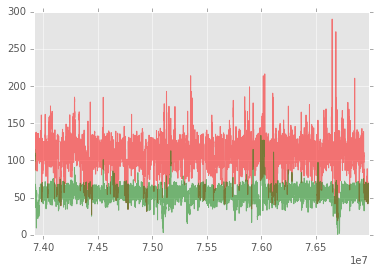

In [48]:
tmp_p_df['Rolling_w1000_p'].plot(alpha=0.5, color='r')
tmp_p_df_ph['Rolling_w1000_ph_p'].plot(alpha=0.5, color='g')

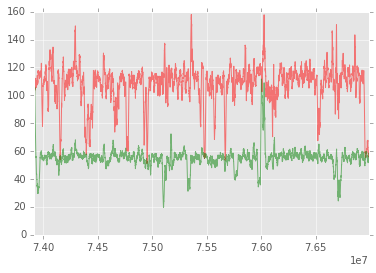

In [49]:
tmp_p_df['Rolling_w10000_p'].plot(alpha=0.5, color='r')
tmp_p_df_ph['Rolling_w10000_ph_p'].plot(alpha=0.5, color='g')

In [55]:
r = tmp_p_df.rolling(window=10000, min_periods=1)
r_ph = tmp_p_df_ph.rolling(window=10000, min_periods=1)

In [56]:
r.corr(r_ph)

ValueError: could not convert string to float: 'pcontig_000'

/home/benjamin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10000).corr(other=<Series>)
  if __name__ == '__main__':


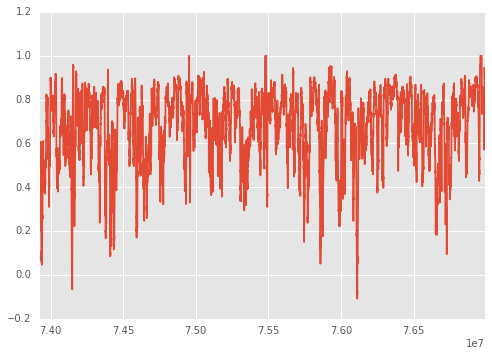

In [87]:
pd.rolling_corr(tmp_p_df['coverage'], tmp_p_df_ph['coverage'], window=10000).plot()

In [79]:
tmp_p_df['Rolling_w10000'].cov(tmp_p_df_ph['Rolling_w10000'])

19.986982756042035

In [ ]:
tmp_p_df.rolling(window=1000, min_periods=1)['coverage'].mean()

In [70]:
tmp_p_df[(tmp_p_df['Rolling_w1000'] < (mean_s2000_ph_p + 2*std_s2000_ph_p) )]

,contig,position,coverage,Rolling_w1000
73917361,pcontig_000,1,57,57.000000
73917362,pcontig_000,2,57,57.000000
73917363,pcontig_000,3,57,57.000000
73917364,pcontig_000,4,59,57.500000
73917365,pcontig_000,5,60,58.000000
73917366,pcontig_000,6,60,58.333333
73917367,pcontig_000,7,60,58.571429
73917368,pcontig_000,8,60,58.750000
73917369,pcontig_000,9,64,59.333333
73917370,pcontig_000,10,65,59.900000


In [18]:
len(tmp_p_df[(tmp_p_df['Rolling_w1000'] > threshold_up) ])

112541

In [19]:
tmp_p_df['coverage'].mean()

107.44613839657615

In [65]:
tmp_p_df_ph['coverage'].mean()

54.931275186916864

In [ ]:
tmp_p_df[(tmp_p_df['Rolling_w1000'] < threshold_down) ]

In [ ]:
tmp_p_df = p_cov[p_cov[0] == 'tmp_p_df']

In [ ]:
tmp_p_df.rolling(window=1000, min_periods=1)[2].mean()

In [147]:
!pwd

/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/downstream_analysis_2017/scripts


In [152]:
import os
os.chdir('/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/032017_assembly')
fout = open('pcontig_greater_2000.txt', 'w')
for x in pcontig_greater_2000:
    fout.writelines('%s\n'%x)
fout.close()
pcontig_greater_2000

Index(['pcontig_151', 'pcontig_183', 'pcontig_190', 'pcontig_194',
       'pcontig_196', 'pcontig_197', 'pcontig_198', 'pcontig_201',
       'pcontig_209', 'pcontig_211', 'pcontig_216', 'pcontig_226',
       'pcontig_227', 'pcontig_234', 'pcontig_236', 'pcontig_237',
       'pcontig_238', 'pcontig_241', 'pcontig_245', 'pcontig_247'],
      dtype='object', name='contig')

In [157]:
h_contig = h_cov['pcontig'].unique().tolist()

In [159]:
h_cov.head()

,contig,position,coverage,pcontig
0,hcontig_014_192,1,0,pcontig_014
1,hcontig_014_192,2,0,pcontig_014
2,hcontig_014_192,3,0,pcontig_014
3,hcontig_014_192,4,0,pcontig_014
4,hcontig_014_192,5,0,pcontig_014


In [160]:
hcontig_greater_2000 = h_cov[h_cov['pcontig'].isin(pcontig_greater_2000)]['contig'].unique().tolist()

In [161]:
import os
os.chdir('/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/032017_assembly')
fout = open('hcontig_greater_2000.txt', 'w')
for x in hcontig_greater_2000:
    fout.writelines('%s\n'%x)
fout.close()
hcontig_greater_2000

['hcontig_241_001',
 'hcontig_234_001',
 'hcontig_234_002',
 'hcontig_238_001',
 'hcontig_238_002']

In [162]:
pcontig_smaller_2000
os.chdir('/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/032017_assembly')
fout = open('pcontig_smaller_2000.txt', 'w')
for x in pcontig_smaller_2000:
    fout.writelines('%s\n'%x)
fout.close()

In [163]:
hcontig_smaller_2000 = h_cov[~h_cov['pcontig'].isin(pcontig_greater_2000)]['contig'].unique().tolist()

In [164]:
os.chdir('/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/032017_assembly')
fout = open('hcontig_smaller_2000.txt', 'w')
for x in hcontig_smaller_2000:
    fout.writelines('%s\n'%x)
fout.close()